# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [1]:
import pandas as pd

In [2]:
tabela = pd.read_csv("advertising_aula3.csv")
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
display(tabela.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


None

#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

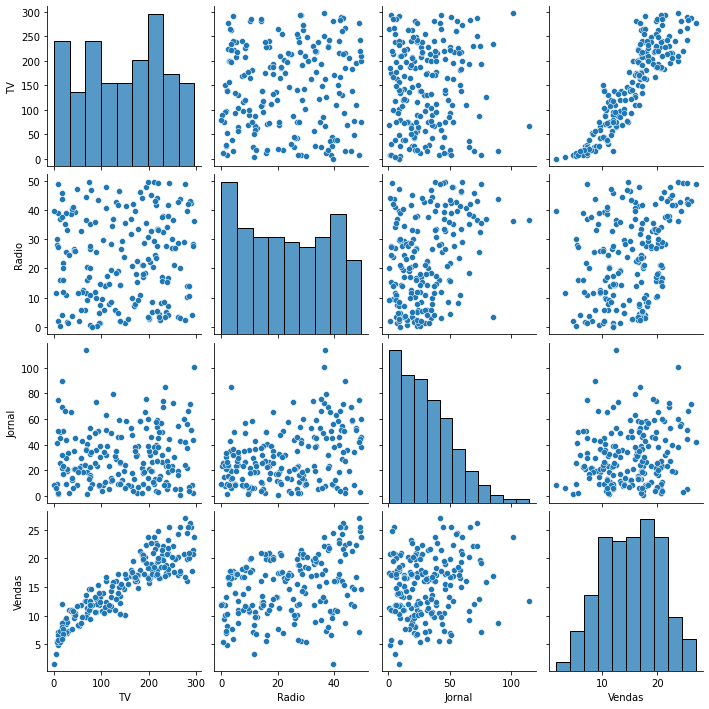

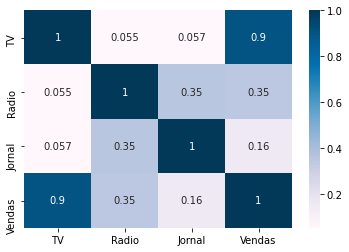

In [44]:
import seaborn as sns #sns cria o gráfico
import matplotlib.pyplot as plt # plt exibe

sns.pairplot(tabela)
plt.show()

sns.heatmap(tabela.corr(), cmap= "PuBu", annot = True) # .corr() é o 1º argumento que calcula a correlação e indica que esse é o valor a ser usado no mapa de calor; cmap indica a paleta de cores; annot = True significa que os números devem aparecer dentro dos quadrados do gráfico, nos eixos #
plt.show()

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [33]:
from sklearn.model_selection import train_test_split #esta função separa os dados em função de treino e de teste

x = tabela.drop("Vendas", axis = 1)   #informações para a previsão com excessão da coluna Vendas 
y = tabela["Vendas"]  #valores para calcular nesta análise

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1) #o padrão de teste é 10%, mas selecionei teste para 30%


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

#criando a IA com 2 modelos:
linear = LinearRegression()
randomForest = RandomForestRegressor()

#treinando a IA para saber qual dos 2 modelos é melhor. Usa-se .fit:
linear.fit(x_train, y_train)
randomForest.fit(x_train, y_train)  

RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece
- Também vamos olhar o MSE (Erro Quadrático Médio) -> diz o quanto o nosso modelo "erra" quando tenta fazer uma previsão

In [35]:
from sklearn import metrics

#previsões
teste_linear = linear.predict(x_test)
teste_random = randomForest.predict(x_test)

#para saber o R^2 destas previsões:
r2_linear = metrics.r2_score(y_test, teste_linear)
r2_random = metrics.r2_score(y_test, teste_random)
print(r2_linear, r2_random)

#para saber o erro destas previsões:
erro_linear = metrics.mean_squared_error(y_test, teste_linear)
erro_random = metrics.mean_squared_error(y_test, teste_random)
print(erro_linear, erro_random)

0.9077120272117652 0.9773661805173722
2.355425938019241 0.577673166666666


#### Visualização Gráfica das Previsões

,Vendas Reais,Previsão Random
0,23.8,23.472
1,16.6,17.402
2,11.9,13.054
3,19.8,19.105
4,17.6,18.525
5,25.5,24.657
6,16.9,17.087
7,17.9,17.964
8,10.5,11.524
9,17.1,19.057


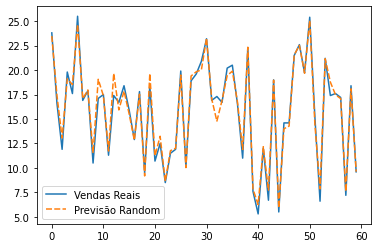

In [36]:
#Criando um dataframe e adicionando as tabelas Vendas Reais e Previsão Random para comparar os valores das vendas reais e da IA que prevê as vendas:
tabela_comparacao = pd.DataFrame()
tabela_comparacao["Vendas Reais"] = y_test
tabela_comparacao["Previsão Random"] = teste_random
tabela_comparacao = tabela_comparacao.reset_index(drop=True) #organiza o índice dos elementos na tabela


display(tabela_comparacao)
sns.lineplot(data=tabela_comparacao)
plt.show()

#### Qual a importância de cada variável para as vendas?

In [42]:
print(randomForest.feature_importances_)
print("TV", "Radio", "Jornal")

[0.83335973 0.15052059 0.01611968]
TV Radio Jornal


#### Será que estamos investindo certo?

In [45]:
print(tabela[["TV", "Radio", "Jornal"]].sum())

TV        29408.5
Radio      4652.8
Jornal     6110.8
dtype: float64
